In [221]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
products = pd.read_csv("products.csv",index_col = 0)

In [17]:
pd.set_option('display.max_colwidth', -1)

In [4]:
products.head()

,Brand,Product,Type,Avg Rating,Number of Reviews,Percentage Would Buy Again
0,MAC Cosmetics,Studio Fix Powder Plus Foundation,Powder,3.7,3938,0.66
1,bareMinerals,Bare Minerals ALL,Powder,2.9,3074,0.44
2,bareMinerals,"Bare Minerals in 1.2, fairly light",Powder,3.5,1152,0.59
3,L'Oreal Paris,Bare Naturale Powdered Mineral Foundation,Powder,3.5,1092,0.62
4,Physicians Formula,Mineral Wear Talc-Free Mineral Loose Powder,Powder,3.6,800,0.65


In [55]:
brand_list=products["Brand"].tolist()
product_list=products["Product"].tolist()

In [56]:
type(brand_list)

list

In [6]:
a=products.groupby("Brand")["Number of Reviews"].mean()
b=products.groupby("Brand")["Avg Rating"].mean()
c=products.groupby("Brand")["Percentage Would Buy Again"].mean()

In [7]:
Brand=pd.DataFrame({"NumberofReviews":a,"AvgRating":b,"Repurchase":c})
Brand.head()

,NumberofReviews,AvgRating,Repurchase
Brand,,,
AVEDA,119.5,4.0,0.735
Agnes B.,124.0,2.7,0.430
Alima Pure,451.0,4.0,0.720
Almay,109.0,2.3,0.260
Anastasia Beverly Hills,29.0,3.2,0.440


In [8]:
Brand["Repurchase"].apply(lambda x: x/max(Brand["Repurchase"]))

Brand
AVEDA                      0.798913
Agnes B.                   0.467391
Alima Pure                 0.782609
Almay                      0.282609
Anastasia Beverly Hills    0.478261
Australis                  1.000000
Avon                       0.679348
Aziza                      0.847826
BECCA                      0.641304
Ben Nye                    0.945652
Bite Beauty                0.706522
Black Opal                 0.826087
Bobbi Brown                0.608696
Boots                      0.630435
CHANEL                     0.668478
CLARINS                    0.717391
CLINIQUE                   0.673913
COVERGIRL                  0.646739
Cover FX                   0.673913
DHC                        0.706522
Dior                       0.684783
EstÃ©e Lauder              0.695652
Everyday Minerals          0.739130
GOSH                       0.695652
Giorgio Armani             0.913043
GloMinerals                0.858696
Hard Candy                 0.706522
Hourglass Cosmetics   

In [9]:
Brand["norm_reviews"]=Brand["NumberofReviews"].apply(lambda x: x/max(Brand["NumberofReviews"]))
Brand["norm_ratings"]=Brand["AvgRating"].apply(lambda x: x/max(Brand["AvgRating"]))
Brand["norm_repurchase"]=Brand["Repurchase"].apply(lambda x: x/max(Brand["Repurchase"]))

In [10]:
Brand.head()

,NumberofReviews,AvgRating,Repurchase,norm_reviews,norm_ratings,norm_repurchase
Brand,,,,,,
AVEDA,119.5,4.0,0.735,0.108676,0.888889,0.798913
Agnes B.,124.0,2.7,0.430,0.112768,0.600000,0.467391
Alima Pure,451.0,4.0,0.720,0.410149,0.888889,0.782609
Almay,109.0,2.3,0.260,0.099127,0.511111,0.282609
Anastasia Beverly Hills,29.0,3.2,0.440,0.026373,0.711111,0.478261


In [32]:
engagement=[]
for p in Brand.itertuples():
    e_score = .2*p.norm_ratings+.5*p.norm_reviews+.3*p.norm_repurchase
    engagement.append(e_score)
Brand["engagement"]=engagement

In [33]:
percentage=Brand["engagement"].quantile(q=0.9)

In [64]:
top_brand=Brand[Brand["engagement"]>percentage]
top_brand.reset_index(level=0, inplace=True)
top_brand

,Brand,NumberofReviews,AvgRating,Repurchase,norm_reviews,norm_ratings,norm_repurchase,engagement
0,Alima Pure,451.00,4.000,0.720,0.410149,0.888889,0.782609,0.617635
1,Everyday Minerals,473.50,3.800,0.680,0.430611,0.844444,0.739130,0.605934
2,Jane Iredale,468.50,3.900,0.685,0.426064,0.866667,0.744565,0.609735
3,MAC Cosmetics,1099.60,3.560,0.602,1.000000,0.791111,0.654348,0.854527
4,Monistat,900.00,3.900,0.750,0.818479,0.866667,0.815217,0.827138
5,Palladio Beauty,389.00,4.100,0.770,0.353765,0.911111,0.836957,0.610192
6,Smashbox,642.75,3.250,0.485,0.584531,0.722222,0.527174,0.594862
7,Yves Saint Laurent,899.00,3.700,0.640,0.817570,0.822222,0.695652,0.781925
8,benefit Cosmetics,744.00,3.175,0.475,0.676610,0.705556,0.516304,0.634307


In [14]:
Brand[Brand["engagement"]<percentage]["engagement"].plot(kind='bar',figsize=(12,6))

In [15]:
reviews = pd.read_csv("reviews.csv",index_col = 0)
reviews.head()

,Product,Rating,Username,Date,Age,Skin,Hair,Eyes,Review
0,Studio Fix Powder Plus Foundation,4,Marlen86,on 11/25/2018 4:35:00 PM,30-35,"Oily, Fair-Medium, Not Sure","Brown, Other, Other",Brown,"Nice pigmented powder, especially to cover ski..."
1,Studio Fix Powder Plus Foundation,5,babypuggies,on 10/31/2018 9:42:00 AM,19-24,"Combination, Medium, Warm","Blond, Straight, Medium",Brown,This has become my go-to foundation now! My oi...
2,Studio Fix Powder Plus Foundation,4,ChristopherCupcakes,on 10/22/2018 1:28:00 PM,44-55,"Combination, Medium, Neutral","Other, Straight, Medium",Green,This is an amazing powder foundation that leav...
3,Studio Fix Powder Plus Foundation,4,congolesedoll,on 10/9/2018 4:39:00 PM,19-24,"Very Oily, Dark, Not Sure","Blond, Other, Other",Brown,Amazing powder that keeps you MATTE and keeps ...
4,Studio Fix Powder Plus Foundation,5,manowaris,on 10/9/2018 2:58:00 PM,19-24,"Acne-prone, Fair, Neutral","Brown, Wavy, Coarse",Blue,I bought this powder a lot. I love it. It has ...


In [ ]:
combo = ""

for data in reviews.itertuples():
    combo = data.Product+data.Age
    

In [139]:
reviews["prod_age"]=reviews["Age"]+" "+reviews["Product"]

In [140]:
reviews.head()

,Product,Rating,Username,Date,Age,Skin,Hair,Eyes,Review,prod_age
0,MAC Cosmetics,4,Marlen86,on 11/25/2018 4:35:00 PM,30-35,"Oily, Fair-Medium, Not Sure","Brown, Other, Other",Brown,"Nice pigmented powder, especially to cover skin imperfections.",30-35 MAC Cosmetics
1,MAC Cosmetics,5,babypuggies,on 10/31/2018 9:42:00 AM,19-24,"Combination, Medium, Warm","Blond, Straight, Medium",Brown,"This has become my go-to foundation now! My oily dehydrated skin went haywire this year. All my trusted foundations, even purportedly hydrating Serum Foundation from The Ordinary, were too dry and cakey on me despite me rationing the tiniest amount. I began to avoid matte foundations like the plague.This foundation, however, gave me the most beautiful finish with medium coverage. Yes, it was matte, but for the first time in a while, it did not cake up or break down. I like to set it with plain rosewater for a more satin finish. The staying power was marvelous, lasting 12 hours without losing a tincture of coverage. Bonus points for being much easier to apply as opposed to a liquid foundation! It is also incredibly versatile.For lighter coverage, I use a flat top powder brush and buff it all over my face. For medium coverage, I pick up some power on the same brush, spritz a little rosewater on the brush, and buff it into my skin. This does not affect the finish of the product at all; just the coverage itself.If you're looking for oil control, this isn't your bag of chips. But then again, my skin is astoundingly oily, and I start to get shiny about 2 hours after application no matter what I use. So maybe it is just me, and not this powder.",19-24 MAC Cosmetics
2,MAC Cosmetics,4,ChristopherCupcakes,on 10/22/2018 1:28:00 PM,44-55,"Combination, Medium, Neutral","Other, Straight, Medium",Green,"This is an amazing powder foundation that leaves skin beautifully finished, matte and looking flawless. You can use this alone and it has a full coverage foundation or you can build it up and layer it over a liquid foundation to help set it and get more coverage. I'm a light skin and usually wear medium or natural medium foundations and I'm an NW 25 in this.",44-55 MAC Cosmetics
3,MAC Cosmetics,4,congolesedoll,on 10/9/2018 4:39:00 PM,19-24,"Very Oily, Dark, Not Sure","Blond, Other, Other",Brown,Amazing powder that keeps you MATTE and keeps the makeup in place,19-24 MAC Cosmetics
4,MAC Cosmetics,5,manowaris,on 10/9/2018 2:58:00 PM,19-24,"Acne-prone, Fair, Neutral","Brown, Wavy, Coarse",Blue,I bought this powder a lot. I love it. It has medium + coverage. It doesnât have the most natural look on me but it is ok. Donât use it around my eyes aa itâs makes me look 100,19-24 MAC Cosmetics


In [119]:
reviews["Age"].unique()

array(['30-35', '19-24', '44-55', '56 & Over', '36-43', '25-29',
       '18 & Under', 'Unknown'], dtype=object)

In [59]:
reviews.replace(product_list,brand_list,inplace=True)

In [81]:
top_reviews=reviews[reviews["Product"].isin(top_brand["Brand"])==True]

In [ ]:
top_reviews=reviews[reviews["Product"].isin(top_brand["Brand"])==True]

In [87]:
len(top_reviews)

15568

# lift

In [183]:
age=reviews[reviews["Age"]!='Unknown']
age_list=age["Age"].unique()

In [184]:
unique_products=products["Brand"].unique().tolist()[:7]
top_reviews=reviews[reviews["Product"].isin(unique_products)==True]


In [185]:
unique_products
product_combos = []
for i in range (len(unique_products)):
    for j in range (len(age_list)):
        product_combo = (unique_products[i], age_list[j])
        product_combos.append(product_combo)

In [186]:
unique_products

['MAC Cosmetics',
 'bareMinerals',
 "L'Oreal Paris",
 'Physicians Formula',
 'Jane Iredale',
 'Maybelline New York',
 'Laura Mercier']

In [187]:
top_reviews.shape

(21393, 10)

In [188]:
product_combo_dict = {}
for bc in product_combos:
    product_combo_dict[bc] = 0

In [189]:
for bc in product_combos:
    for c in reviews["prod_age"]:
        product1 = bc[0]
        product2 = bc[1]
        if product1 in c and product2 in c:
            product_combo_dict[bc] += 1

In [190]:
product_combo_dict

{('MAC Cosmetics', '30-35'): 695,
 ('MAC Cosmetics', '19-24'): 2147,
 ('MAC Cosmetics', '44-55'): 148,
 ('MAC Cosmetics', '56 & Over'): 16,
 ('MAC Cosmetics', '36-43'): 371,
 ('MAC Cosmetics', '25-29'): 1299,
 ('MAC Cosmetics', '18 & Under'): 749,
 ('bareMinerals', '30-35'): 1358,
 ('bareMinerals', '19-24'): 2489,
 ('bareMinerals', '44-55'): 429,
 ('bareMinerals', '56 & Over'): 79,
 ('bareMinerals', '36-43'): 807,
 ('bareMinerals', '25-29'): 1657,
 ('bareMinerals', '18 & Under'): 719,
 ("L'Oreal Paris", '30-35'): 424,
 ("L'Oreal Paris", '19-24'): 865,
 ("L'Oreal Paris", '44-55'): 240,
 ("L'Oreal Paris", '56 & Over'): 63,
 ("L'Oreal Paris", '36-43'): 295,
 ("L'Oreal Paris", '25-29'): 485,
 ("L'Oreal Paris", '18 & Under'): 395,
 ('Physicians Formula', '30-35'): 135,
 ('Physicians Formula', '19-24'): 355,
 ('Physicians Formula', '44-55'): 50,
 ('Physicians Formula', '56 & Over'): 16,
 ('Physicians Formula', '36-43'): 81,
 ('Physicians Formula', '25-29'): 191,
 ('Physicians Formula', '18 &

In [191]:
unique_products_dict = {}
for b in unique_products:
    for c in reviews["prod_age"]:
        if b in c:
            if b in unique_products_dict:
                unique_products_dict[b] += 1
            else:
                unique_products_dict[b] = 1

In [199]:
age_dict = {}
for b in age_list:
    for c in reviews["prod_age"]:
        if b in c:
            if b in age_dict:
                age_dict[b] += 1
            else:
                age_dict[b] = 1

In [200]:
age_dict

{'30-35': 7884,
 '19-24': 16124,
 '44-55': 3053,
 '56 & Over': 652,
 '36-43': 5136,
 '25-29': 10735,
 '18 & Under': 5730}

In [192]:
unique_products_dict

{'MAC Cosmetics': 5497,
 'bareMinerals': 7643,
 "L'Oreal Paris": 2789,
 'Physicians Formula': 1033,
 'Jane Iredale': 937,
 'Maybelline New York': 1854,
 'Laura Mercier': 1640}

In [193]:
tot_number = top_reviews.shape[0]

In [194]:
tot_number

21393

In [201]:
lifts_dict = {}
for a in product_combo_dict:
    if a[0] == a[1]:
        lift = 0
    else:
        combo_count = product_combo_dict[a]
        attri1_count = unique_products_dict[a[0]]
        attri2_count = age_dict[a[1]]
        lift = (tot_number * combo_count) / (attri1_count * attri2_count)
    lifts_dict[a] = lift

In [202]:
matrix = []
row = -1
current_attri = ''
for combo in lifts_dict:
    attri = combo[0]
    lift = lifts_dict[combo]
    if attri == current_attri:
        matrix[row].append(lift)
    else:
        row += 1
        current_attri = attri
        matrix.append([])
        matrix[row].append(lift)

In [205]:
simi = pd.DataFrame(matrix, columns=unique_products, index=age_list)

In [206]:
simi

,MAC Cosmetics,bareMinerals,L'Oreal Paris,Physicians Formula,Jane Iredale,Maybelline New York,Laura Mercier
30-35,0.343071,0.518209,0.188660,0.095503,0.281122,0.470926,0.508713
19-24,0.482126,0.432076,0.393313,0.339146,0.439801,0.432044,0.351222
44-55,0.412518,0.411497,0.602987,0.741167,0.440575,0.346548,0.528769
56 & Over,0.354616,0.455960,0.339168,0.508211,0.326611,0.368470,0.679477
36-43,0.648684,0.263374,0.717921,0.875436,0.649023,0.455139,0.079691
25-29,0.272225,0.449416,0.325038,0.513230,0.296559,0.286993,1.045141
18 & Under,0.522839,0.390753,0.350360,0.400138,0.530822,0.495777,0.184399


In [207]:
#dissimilarity
dis=matrix
for i in range (len(matrix)):
    for j in range (len(matrix[i])):
        if matrix[i][j] != 0:
            dis[i][j] = 1/matrix[i][j]

In [213]:
dissimilarity = pd.DataFrame(dis, columns=unique_products, index=age_list)

In [214]:
dissimilarity

,MAC Cosmetics,bareMinerals,L'Oreal Paris,Physicians Formula,Jane Iredale,Maybelline New York,Laura Mercier
30-35,2.914848,1.929722,5.300528,10.470843,3.557174,2.123474,1.965744
19-24,2.074145,2.314409,2.542504,2.948578,2.273755,2.314577,2.847200
44-55,2.424139,2.430152,1.658412,1.349223,2.269759,2.885607,1.891186
56 & Over,2.819950,2.193174,2.948393,1.967688,3.061742,2.713922,1.471721
36-43,1.541582,3.796888,1.392911,1.142288,1.540778,2.197132,12.548521
25-29,3.673430,2.225108,3.076567,1.948443,3.372012,3.484407,0.956809
18 & Under,1.912633,2.559162,2.854205,2.499135,1.883870,2.017038,5.423027


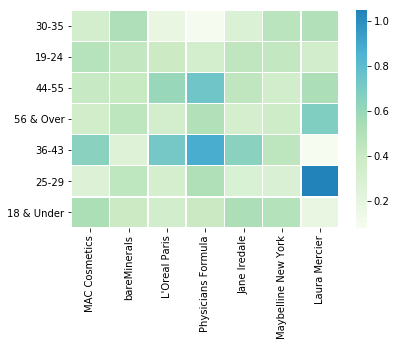

In [266]:
sns.heatmap(simi, linewidth=0.5,cmap = 'GnBu', center=0.7)

### Plot MDS Map

In [210]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

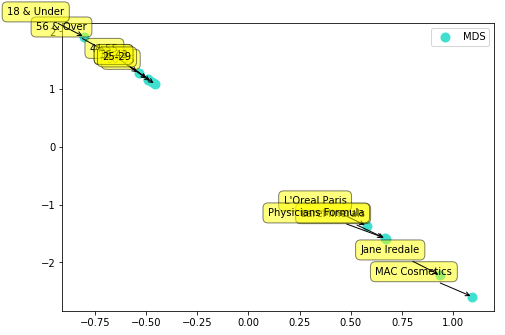

In [182]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100

plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

for label, x, y in zip(unique_products, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

# LDA

In [279]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')[:]

In [280]:
import re
text=top_reviews["Review"].tolist()


In [289]:
def clean_data(text):
    word=[]
    #delete punctuations stopwords
    words = re.compile(r'[^a-zA-Z]+').split(text)
    for w in words:
        if w not in stopwords and len(w)>2:
            word.append(w)
    return word

In [291]:
w=[]
for i in text:
    words=clean_data(i)
    w.append(words)

In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
# init count vectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                            )

In [234]:
word_vectorized = vectorizer.fit_transform(words)

In [247]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 5, random_state = 1)

In [248]:
lda.fit(word_vectorized)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=5, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=1,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [267]:
# column names
topicnames = ["Topic" + str(i) for i in range(1, lda.n_components + 1)]

# weights of each keyword in each topic

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda.components_.T)

# Assign Column and Index
df_topic_keywords.index = vectorizer.get_feature_names()
df_topic_keywords.columns = topicnames

# View
df_topic_keywords

,Topic1,Topic2,Topic3,Topic4,Topic5
aa,0.200073,0.800717,0.200016,0.200033,0.200011
aaaaa,0.933019,0.200984,0.200001,0.202304,0.201413
aaaaaaaah,0.200028,0.205295,1.189725,0.200017,0.202664
aaaaaall,0.200008,0.206322,0.922183,0.202281,0.202765
aaaaah,0.200039,1.301928,0.508222,0.200020,0.204569
aaaaahh,0.200022,0.205043,1.151331,0.206482,0.202265
aaaand,0.200010,0.205758,0.205578,0.200006,1.327164
aaah,0.200008,0.210404,0.203006,1.175973,0.202837
aaalllll,0.200017,0.200928,0.208255,0.200010,1.108892
aaanyways,0.200712,0.209842,0.213488,1.588086,0.202473


In [268]:
# throw this onto a csv
df_topic_keywords.to_csv("wordstotopics2.csv")

In [269]:
topic1 = pd.DataFrame(df_topic_keywords.sort_values(by = ['Topic1'], ascending = False).head(10).index.values)
topic1.columns = ["Topic1"]
topic1

,Topic1
0,kit
1,starter
2,veil
3,warmth
4,blur
5,ingredients
6,sooo
7,brushes
8,acid
9,line


In [271]:
topic2 = pd.DataFrame(df_topic_keywords.sort_values(by = ['Topic2'], ascending = False).head(10).index.values)
topic2.columns = ["Topic2"]
topic2

,Topic2
0,skin
1,foundation
2,use
3,powder
4,like
5,product
6,coverage
7,really
8,look
9,love
